In [7]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [3]:
# Define paths to train, test, and validation folders
train_dir = 'C:/Users/alexk/Desktop/SIIA/data/train'  # Path to the training data folder
test_dir = 'C:/Users/alexk/Desktop/SIIA/data/test'      # Path to the testing data folder
valid_dir = 'C:/Users/alexk/Desktop/SIIA/data/valid'    # Path to the validation data folder

In [4]:
# Data preprocessing
# ImageDataGenerator for training data with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Rescale pixel values to be in the range [0, 1]
    rotation_range=20,          # Random rotation applied within the range [-20, 20] degrees
    width_shift_range=0.2,      # Random horizontal shift applied within the range [-0.2, 0.2] of the width
    height_shift_range=0.2,     # Random vertical shift applied within the range [-0.2, 0.2] of the height
    shear_range=0.2,            # Shear transformation applied within the range [-0.2, 0.2]
    zoom_range=0.2,             # Random zoom applied within the range [0.8, 1.2]
    horizontal_flip=True,       # Randomly flip images horizontally
    fill_mode='nearest'         # Strategy used for filling in newly created pixels after transformations
)

# ImageDataGenerator for test data without data augmentation, only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented data for training
train_generator = train_datagen.flow_from_directory(
    train_dir,                  # Path to the training data directory
    target_size=(224, 224),     # Resize images to (224, 224)
    batch_size=32,              # Batch size
    class_mode='binary'         # Type of labels: binary (two classes)
)

# Generate batches of data for validation without augmentation, only rescaling
valid_generator = test_datagen.flow_from_directory(
    valid_dir,                  # Path to the validation data directory
    target_size=(224, 224),     # Resize images to (224, 224)
    batch_size=32,              # Batch size
    class_mode='binary'         # Type of labels: binary (two classes)
)


Found 7684 images belonging to 2 classes.
Found 1921 images belonging to 2 classes.


In [6]:
# Model creation
base_model = MobileNetV2(weights='imagenet', include_top=False)  # Load MobileNetV2 model pre-trained on ImageNet without top layer
x = base_model.output  # Get the output tensor of the base model
x = GlobalAveragePooling2D()(x)  # Apply global average pooling to reduce spatial dimensions
x = Dense(1024, activation='relu')(x)  # Add a fully connected layer with ReLU activation
predictions = Dense(1, activation='sigmoid')(x)  # Add output layer with sigmoid activation for binary classification
model = Model(inputs=base_model.input, outputs=predictions)  # Define the final model with input and output

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False  # Freeze all layers in the base model

# Compile the model
model.compile(optimizer=Adam(),  # Adam optimizer with default learning rate
              loss='binary_crossentropy',  # Binary crossentropy loss function for binary classification
              metrics=['accuracy'])  # Metric to monitor during training is accuracy

# Model training
model.fit(
    train_generator,  # Training data generator
    steps_per_epoch=train_generator.n // train_generator.batch_size,  # Number of steps per epoch
    epochs=15,  # Number of training epochs
    validation_data=valid_generator,  # Validation data generator
    validation_steps=valid_generator.n // valid_generator.batch_size  # Number of steps for validation
)

# Model evaluation
test_generator = test_datagen.flow_from_directory(
    test_dir,  # Test data directory
    target_size=(224, 224),  # Resize images to (224, 224)
    batch_size=16,  # Batch size for testing
    class_mode='binary',  # Type of labels: binary (two classes)
    shuffle=False  # Do not shuffle test data
)

test_loss, test_acc = model.evaluate(test_generator)  # Evaluate the model on test data
print("Test Accuracy:", test_acc)  # Print test accuracy


C:\Users\alexk\AppData\Local\Temp\ipykernel_22412\145534382.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False)


Epoch 1/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 136s 548ms/step - accuracy: 0.8112 - loss: 0.4822 - val_accuracy: 0.8865 - val_loss: 0.2649
Epoch 2/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.9375 - loss: 0.2277 - val_accuracy: 1.0000 - val_loss: 0.1089
Epoch 3/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 125s 512ms/step - accuracy: 0.8731 - loss: 0.2913 - val_accuracy: 0.8943 - val_loss: 0.2483
Epoch 4/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.9062 - loss: 0.1971 - val_accuracy: 1.0000 - val_loss: 0.0407
Epoch 5/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 125s 513ms/step - accuracy: 0.8880 - loss: 0.2685 - val_accuracy: 0.8953 - val_loss: 0.2612
Epoch 6/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - accuracy: 0.7812 - loss: 0.4126 - val_accuracy: 1.0000 - val_loss: 0.0101
Epoch 7/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 177s 729ms/step - accuracy: 0.8919 - loss: 0.2622 - val_accuracy: 0.9062 - val_loss: 0.2390
Epoch 8/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.9062 - loss: 0

In [9]:
# Model evaluation
test_generator = test_datagen.flow_from_directory(
    test_dir,  # Test data directory
    target_size=(224, 224),  # Resize images to (224, 224)
    batch_size=32,  # Batch size for testing
    class_mode='binary',  # Type of labels: binary (two classes)
    shuffle=False  # Do not shuffle test data
)

test_loss, test_acc = model.evaluate(test_generator)  # Evaluate the model on test data
print("Test Accuracy:", test_acc)  # Print test accuracy
print("Test Loss:", test_loss)  # Print test accuracy

Found 1000 images belonging to 2 classes.
 1/32 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8750 - loss: 0.2666

c:\Users\alexk\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9171 - loss: 0.2043
Test Accuracy: 0.906000018119812
Test Loss: 0.23084749281406403


In [7]:
model.save('skin_cancer_model_2.keras')

In [8]:
model = tf.keras.models.load_model('skin_cancer_model_2.keras')

Found 1000 images belonging to 2 classes.


c:\Users\alexk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 208ms/step
Accuracy: 0.906
Precision: 0.9282700421940928
Recall: 0.88
F1-score: 0.9034907597535934


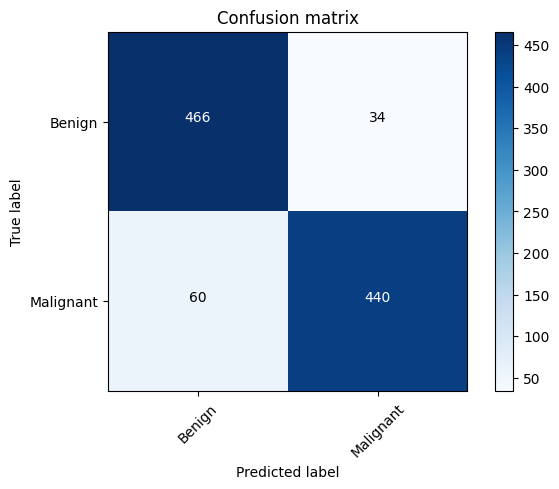

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import load_model

# Generate predictions on the test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

predictions = model.predict(test_generator)  # Generate predictions using the trained model
y_true = test_generator.classes  # True labels of the test data
y_pred = np.round(predictions).flatten()  # Predicted labels rounded to binary values

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)  # Calculate accuracy
precision = precision_score(y_true, y_pred)  # Calculate precision
recall = recall_score(y_true, y_pred)  # Calculate recall
f1 = f1_score(y_true, y_pred)  # Calculate F1-score

print("Accuracy:", accuracy)  # Print accuracy
print("Precision:", precision)  # Print precision
print("Recall:", recall)  # Print recall
print("F1-score:", f1)  # Print F1-score

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)  # Compute confusion matrix

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)  # Display confusion matrix as image
plt.title('Confusion matrix')  # Set title for the plot
plt.colorbar()  # Add color bar for reference
tick_marks = np.arange(2)  # Define tick marks
plt.xticks(tick_marks, ['Benign', 'Malignant'], rotation=45)  # Set x-axis labels
plt.yticks(tick_marks, ['Benign', 'Malignant'])  # Set y-axis labels

thresh = cm.max() / 2.  # Determine threshold for text color
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),  # Add text annotations to cells
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()  # Adjust layout
plt.ylabel('True label')  # Set label for y-axis
plt.xlabel('Predicted label')  # Set label for x-axis
plt.show()  # Display the plot


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step
Probability of melanoma: 99.93%
Probability of mole: 0.07%
The model predicts that the image depicts melanoma.


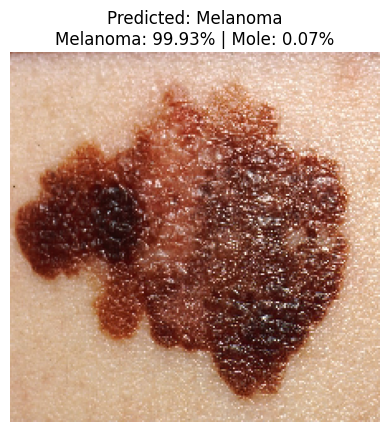

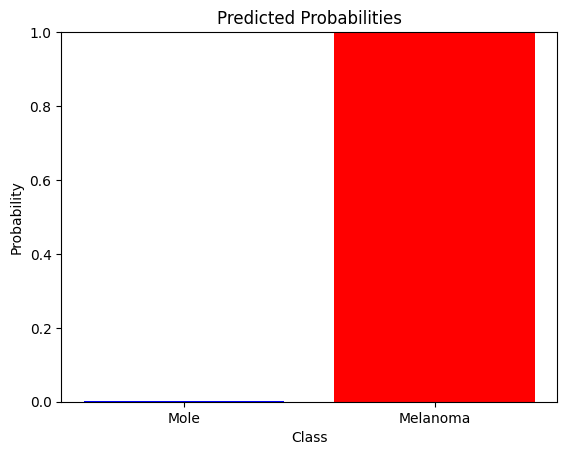

In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define a function to preprocess new images
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values
    return img_array

# Path to the new image
new_image_path = 'melanoma2.jpg'

# Preprocess the new image
new_image = preprocess_image(new_image_path)

# Get predictions
predictions = model.predict(new_image)

# Interpret predictions
probability_malignant = predictions[0][0]
probability_benign = 1 - probability_malignant

print("Probability of melanoma: {:.2f}%".format(probability_malignant * 100))
print("Probability of mole: {:.2f}%".format(probability_benign * 100))

if probability_malignant > 0.5:
    print("The model predicts that the image depicts melanoma.")
else:
    print("The model predicts that the image depicts a mole.")

# Display the image with prediction
img = image.load_img(new_image_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.title('Predicted: {}\nMelanoma: {:.2f}% | Mole: {:.2f}%'.format(
    "Melanoma" if probability_malignant > 0.5 else "Mole",
    probability_malignant * 100,
    probability_benign * 100))
plt.show()

# Create a bar graph showing the probabilities
labels = ['Mole', 'Melanoma']
probabilities = [probability_benign, probability_malignant]
colors = ['blue', 'red']

plt.bar(labels, probabilities, color=colors)
plt.title('Predicted Probabilities')
plt.xlabel('Class')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


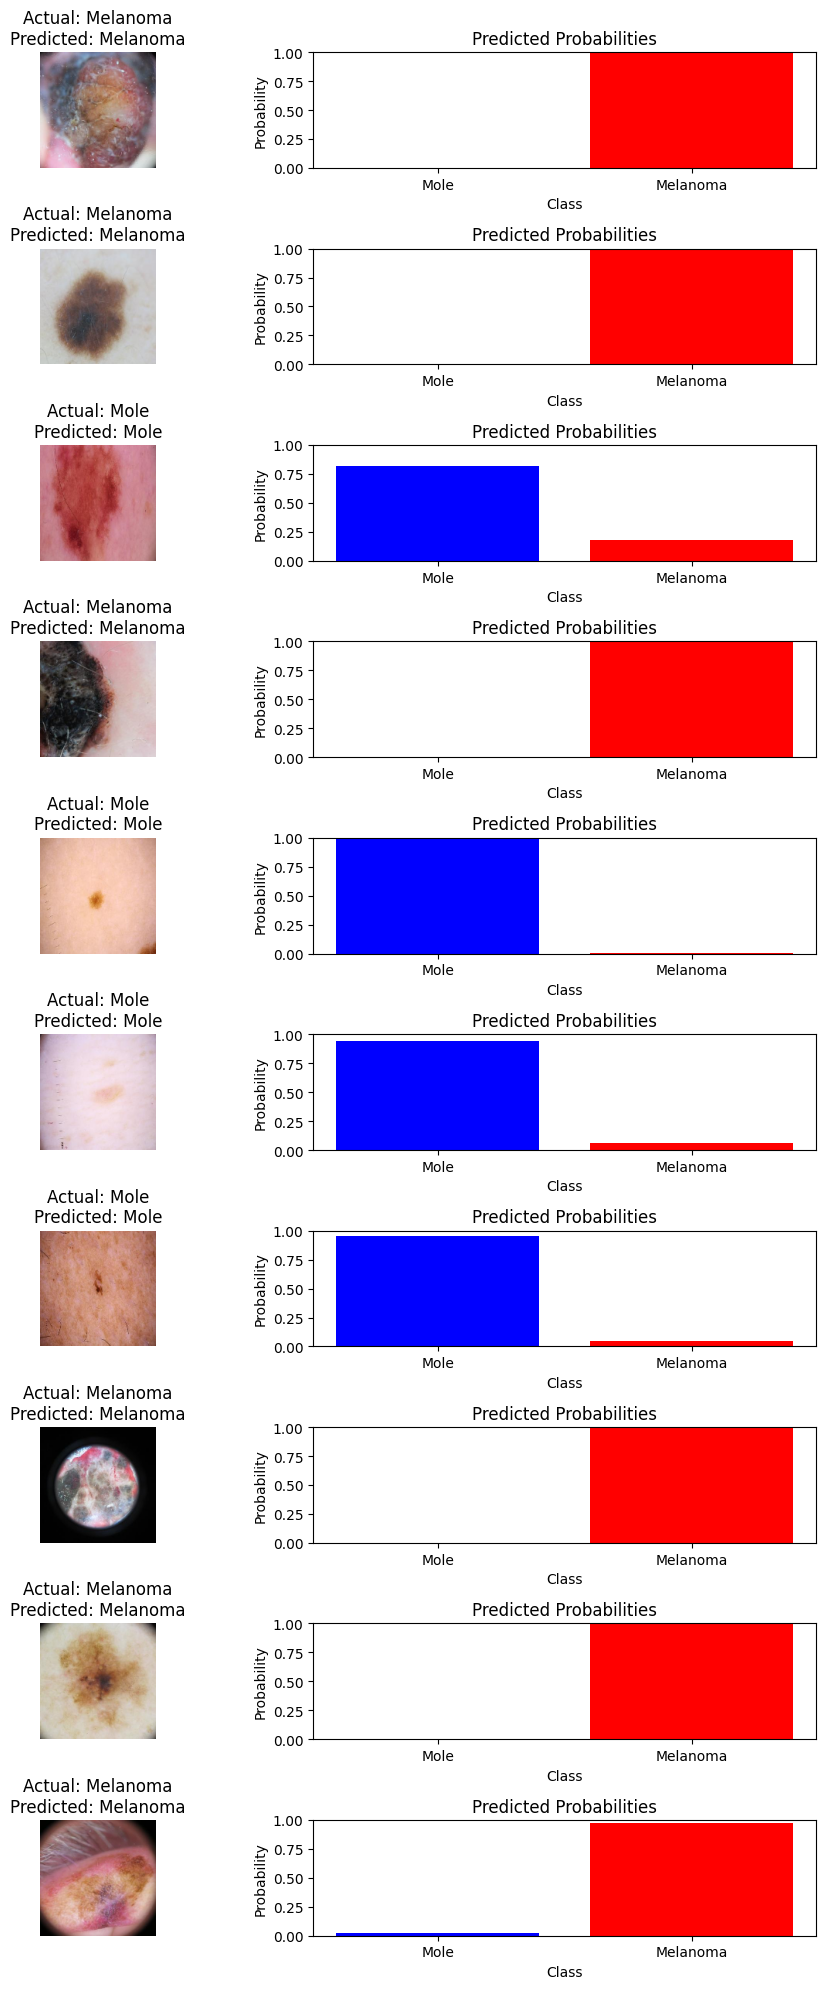

In [17]:
# Define a function to preprocess new images
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values
    return img_array

# Path to the test directory
test_dir = 'data/test'

# Number of images to select
num_images = 10

# Create subplots
fig, axes = plt.subplots(num_images, 2, figsize=(10, 20))

# Iterate over each image
for i in range(num_images):
    # Get a random subfolder (either 'benign' or 'malignant')
    random_subfolder = random.choice(['benign', 'malignant'])

    # Get a random image from the selected subfolder
    random_image_path = random.choice(os.listdir(os.path.join(test_dir, random_subfolder)))
    new_image_path = os.path.join(test_dir, random_subfolder, random_image_path)

    # Determine the actual class of the image based on the folder
    actual_class = "Mole" if random_subfolder == 'benign' else "Melanoma"

    # Preprocess the new image
    new_image = preprocess_image(new_image_path)

    # Get predictions
    predictions = model.predict(new_image)

    # Interpret predictions
    probability_malignant = predictions[0][0]
    probability_benign = 1 - probability_malignant

    # Display the image
    img = image.load_img(new_image_path, target_size=(150, 150))
    axes[i, 0].imshow(img)
    axes[i, 0].set_title('Actual: {}\nPredicted: {}'.format(actual_class, "Melanoma" if probability_malignant > 0.5 else "Mole"))
    axes[i, 0].axis('off')

    # Create a bar graph showing the probabilities
    labels = ['Mole', 'Melanoma']
    probabilities = [probability_benign, probability_malignant]
    colors = ['blue', 'red']
    axes[i, 1].bar(labels, probabilities, color=colors)
    axes[i, 1].set_title('Predicted Probabilities')
    axes[i, 1].set_xlabel('Class')
    axes[i, 1].set_ylabel('Probability')
    axes[i, 1].set_ylim(0, 1)

plt.tight_layout()
plt.show()


In [46]:
accuracy = model.evaluate(validation_generator)[1]
print("Accuracy:", accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8329 - loss: 0.4970
Accuracy: 0.8420000076293945


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Build a deeper CNN model with dropout regularization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Add dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with a lower learning rate
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for more stable training
              metrics=['accuracy'])

# Train the model with more epochs
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,  # Increase the number of epochs
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator))

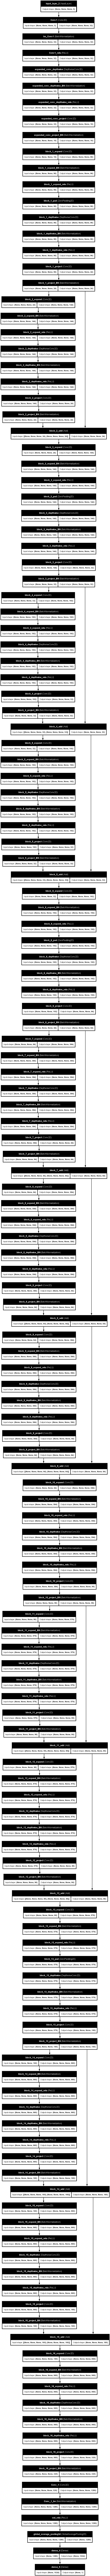

In [28]:
from tensorflow.keras.utils import plot_model

# Save the graphical representation of the model to a file
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
